* By combining particles with different positions into one plot, it enables us to see what position the model predicts to go within +-30min and +-1km.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime as dt
import pytz, datetime
import scipy.io
import arrow
import os
from salishsea_tools import nc_tools, viz_tools, tidetools, stormtools, bathy_tools
from matplotlib import reload
from __future__ import division
import drifter

In [2]:
grid = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc','r')
bathy, X, Y = tidetools.get_bathy_data(grid)
lats = grid.variables['nav_lat']
lons = grid.variables['nav_lon']
bath = grid.variables['Bathymetry']
tracersT = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_10RFdailySmoo/\
SalishSea_1h_20141008_20141010_grid_T.nc')
ssh = tracersT.variables['sossheig']
timesteps = tracersT.variables['time_counter']

In [3]:
def particle_blast(tracks,startdate,i,lon,lat,hour,duration,drifter_one = 'a'):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    ## plot buoy
    ind =drifter.find_start(tracks,startdate)
    traj=tracks[ind[i]]
    axs[0,0].plot(traj['lon'],traj['lat'],'ob')
    axs[0,0].plot(traj['lon'][0],traj['lat'][0],'sr')
    
    [j,i]=tidetools.find_closest_model_point(float(traj['lon'][0]),float(traj['lat'][0]),X,Y,bathy)
    axs[0,0].plot(-123-np.array([18.2, 13.7, 12])/60.,49+np.array([6.4, 8, 7.6])/60.,'-k',lw=2); 
    viz_tools.plot_coastline(axs[0,0], grid, coords='map')
    viz_tools.plot_coastline(axs[0,0], grid, coords='map',isobath=4)
    viz_tools.plot_coastline(axs[0,0], grid, coords='map',isobath=20)
    axs[0,0].set_xlim([-123.6,-123]); axs[0,0].set_ylim([48.8,49.4])
    axs[0,0].set_xticks([-123.6, -123.4, -123.2,-123])
    axs[0,0].set_xticklabels([-123.6, -123.4, -123.2,-123])
    axs[0,0].set_xlabel('Longitude'); axs[0,0].set_ylabel('Latitude') 
    ## plot ssh
    axs[1,0].plot(timesteps[0:48],ssh[0:48,466,329],'-k')   
    axs[1,0].set_xticklabels([])
    axs[1,0].set_ylabel('Water level (m)'); axs[1,0].set_xlabel('Oct 8 - Oct 9 (hrs)')
    axs[1,0].set_title('sossheig, ~Point Atkinson')        
    t=hour
    axs[1,0].plot([timesteps[t],timesteps[t]],[-2.0,1.5],'r-',label='start')  
    t2=hour+duration
    axs[1,0].plot([timesteps[t2],timesteps[t2]],[-2.0,1.5],'b-',label='end')
    ## plot particles
    axs_pa = [axs[0,1],axs[0,2],axs[1,1],axs[1,2]];
    colors=['g','DodgerBlue','DarkViolet']; t = ['-30min','0','30min'];
    keys = ['RFseries','reduvisseries','1e061e05series','jettyseries']
    part = 0
    if drifter_one =='a':
        pa = part 
    else:
        pa = part + 27
    for ax, key in zip(axs_pa, keys):
        viz_tools.plot_coastline(ax,grid,coords='map')
        viz_tools.plot_coastline(ax,grid,coords='map',isobath=4,color='FireBrick')
        viz_tools.plot_coastline(ax,grid,coords='map',isobath=20,color='OrangeRed')
        ax.set_xlim([-123.6,-123]); ax.set_ylim([48.8,49.4])
        ax.set_xticks([-123.6, -123.4, -123.2,-123])
        ax.set_xticklabels([-123.6, -123.4, -123.2,-123])
        ax.set_xlabel('Longitude'); ax.set_ylabel('Latitude') 
        ## plot
        ax.scatter(lon[key][0,0+pa:9+pa],lat[key][0,0+pa:9+pa],color='0.50',marker='s',s=10)
        ax.plot(lon[key][1:,1+pa:9+pa],lat[key][1:,1+pa:9+pa],color=colors[0])
        ax.plot(lon[key][1:,10+pa:18+pa],lat[key][1:,10+pa:18+pa],color=colors[1])
        ax.plot(lon[key][1:,19+pa:27+pa],lat[key][1:,19+pa:27+pa],color=colors[2])
        ax.set_title(key)
    ## to fake the legend
        time30minus, = ax.plot(lon[key][1:,0+pa],lat[key][1:,0+pa],color=colors[0])
        time0, =ax.plot(lon[key][1:,9+pa],lat[key][1:,9+pa],color=colors[1])
        time30plus, = ax.plot(lon[key][1:,18+pa],lat[key][1:,18+pa],color=colors[2])
        ax.legend([time30minus, time0, time30plus], ['-30 min', '0 min', '+30min'], loc='best')
    
    return fig

In [4]:
drifters = scipy.io.loadmat('/ocean/mhalvers/research/drifters/SoG_drifters.mat',squeeze_me=True)
ubc = drifters['ubc']

# Drop112a

In [5]:
drop = 'drop1/12'
runs=['RFseries','reduvisseries','1e061e05series','jettyseries']
base='/ocean/jieliu/research/meopar/Ariane/result/'
file_pattern = 'ariane_trajectories_qualitative.nc'
lon112 = {}; lat112={}
for run in runs:
    path = os.path.join(base,run, drop,file_pattern)
    f = nc.Dataset(path,'r');
    lon112[run] = f.variables['traj_lon']
    lat112[run] = f.variables['traj_lat']

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


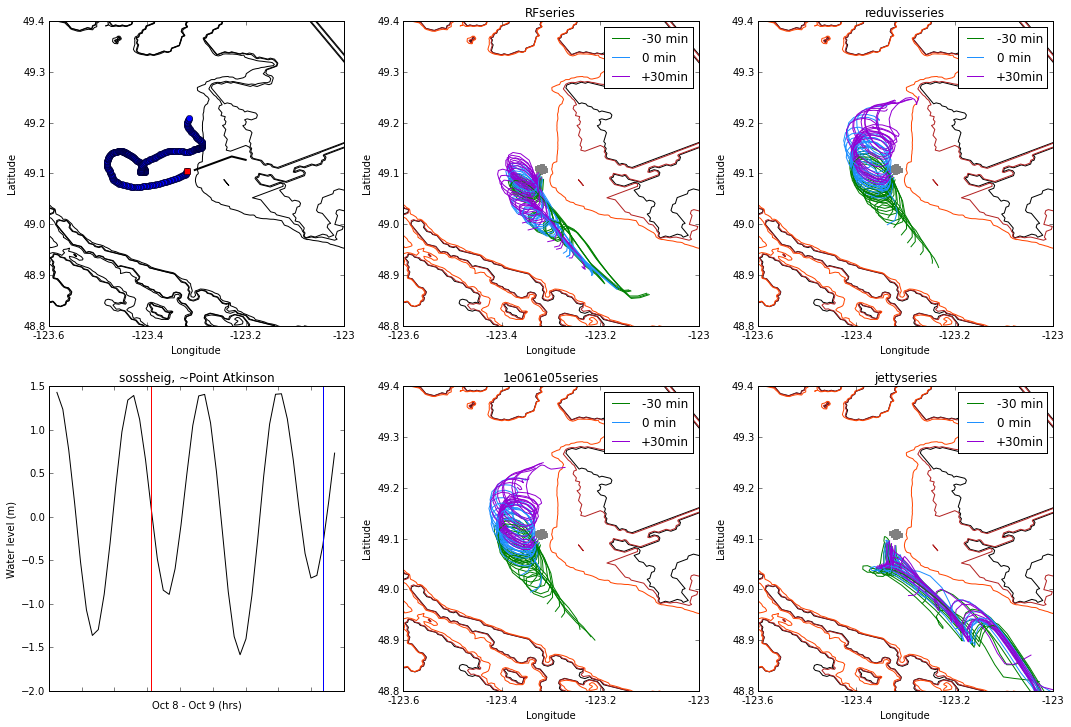

In [6]:
buoy = 2
name, tracks=drifter.organize_info(buoy,ubc)
fig = particle_blast(tracks, dt.datetime(2014,10,8),-1,lon112,lat112,16,29,drifter_one = 'a')

# Drop112b

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


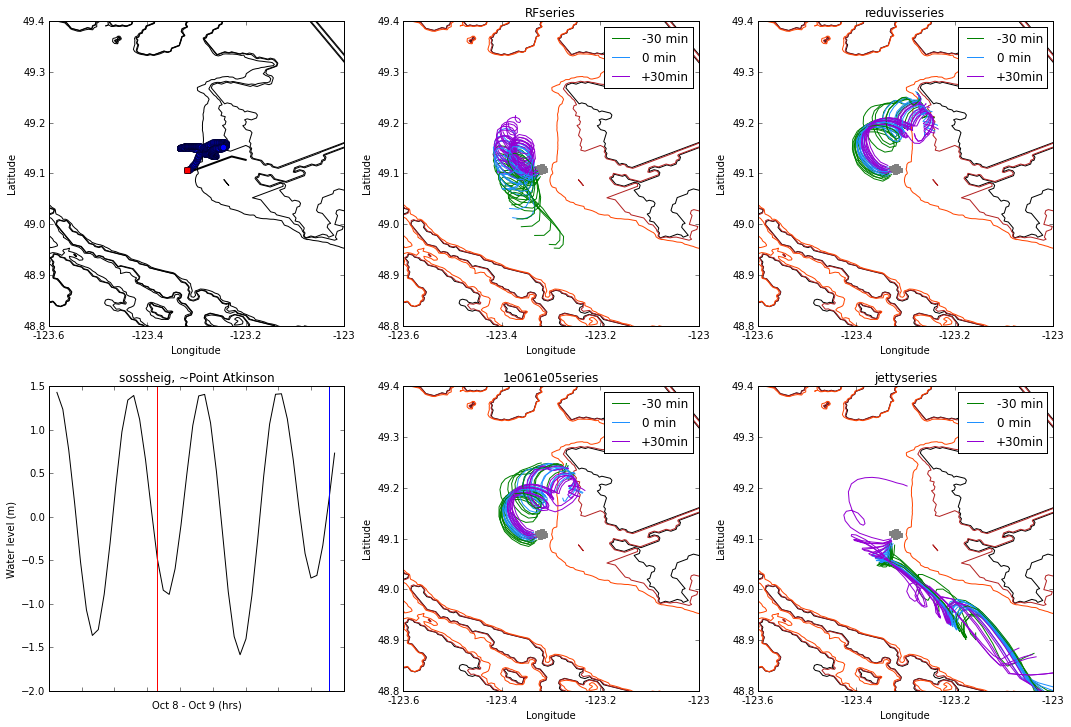

In [8]:
buoy = 3
name, tracks=drifter.organize_info(buoy,ubc)
fig = particle_blast(tracks, dt.datetime(2014,10,8),-1,lon112,lat112,17,29,drifter_one = 'b')

# Drop13

In [9]:
drop = 'drop1/3'
runs=['RFseries','reduvisseries','1e061e05series','jettyseries']
base='/ocean/jieliu/research/meopar/Ariane/result/'
file_pattern = 'ariane_trajectories_qualitative.nc'
lon13 = {}; lat13={}
for run in runs:
    path = os.path.join(base,run, drop,file_pattern)
    f = nc.Dataset(path,'r');
    lon13[run] = f.variables['traj_lon']
    lat13[run] = f.variables['traj_lat']

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


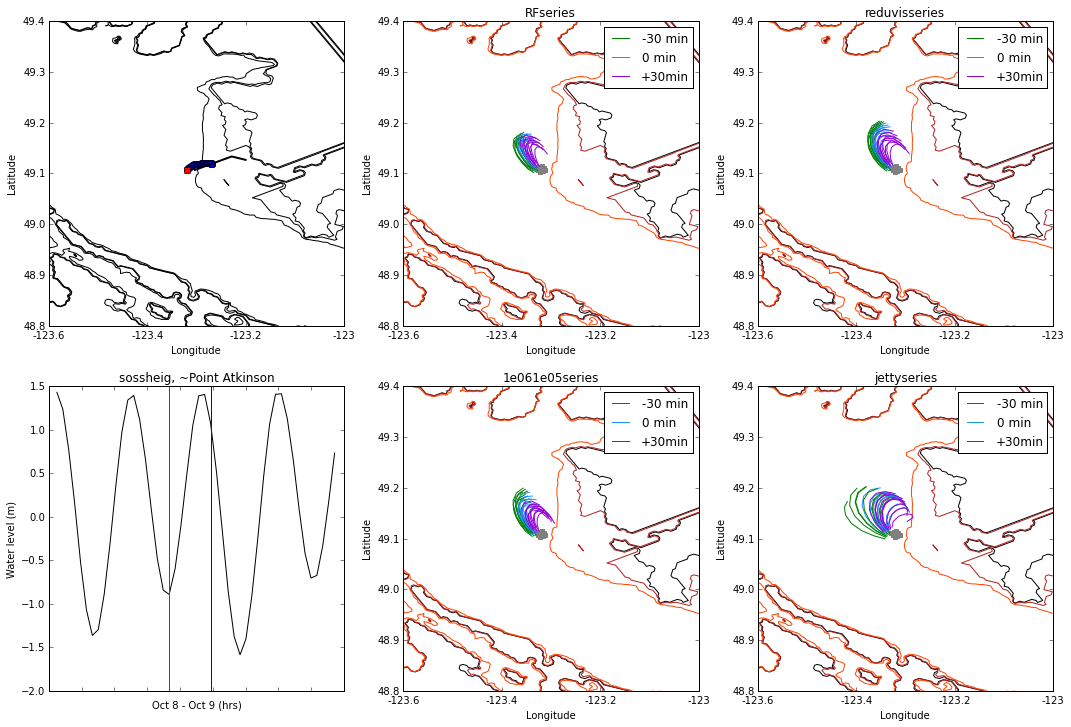

In [10]:
buoy = 9
name, tracks=drifter.organize_info(buoy,ubc)
fig = particle_blast(tracks, dt.datetime(2014,10,8),-1,lon13,lat13,19,7,drifter_one = 'a')

# Drop212a

In [11]:
drop = 'drop2/12'
runs=['RFseries','reduvisseries','1e061e05series','jettyseries']
base='/ocean/jieliu/research/meopar/Ariane/result/'
file_pattern = 'ariane_trajectories_qualitative.nc'
lon212 = {}; lat212={}
for run in runs:
    path = os.path.join(base,run, drop,file_pattern)
    f = nc.Dataset(path,'r');
    lon212[run] = f.variables['traj_lon']
    lat212[run] = f.variables['traj_lat']

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


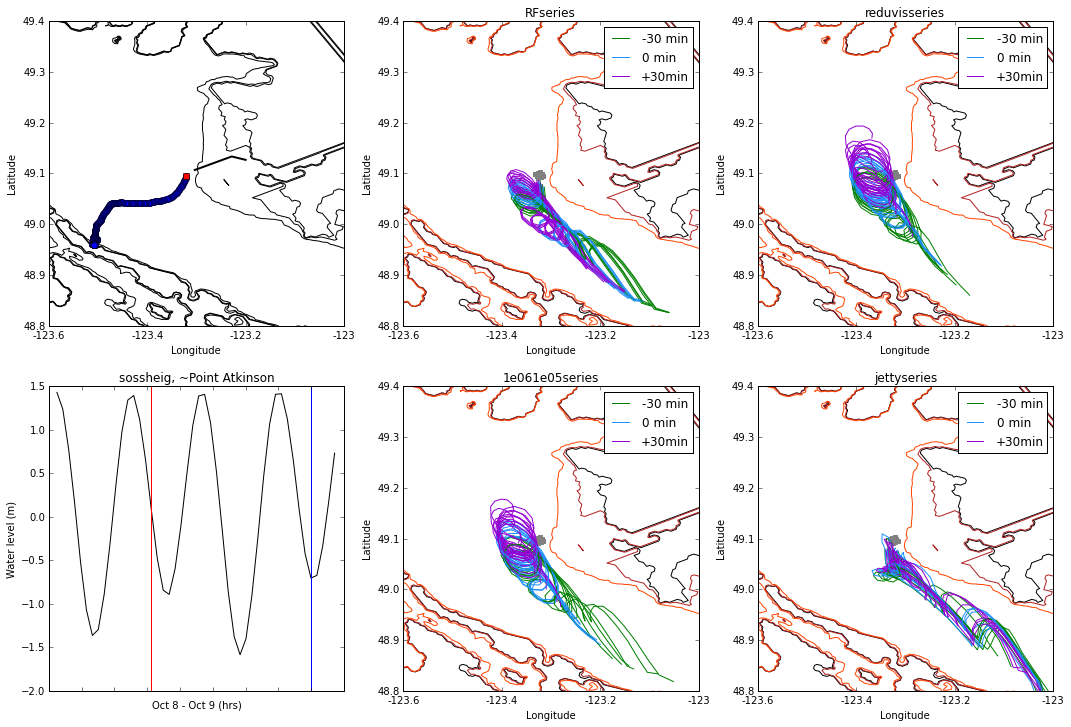

In [12]:
buoy = 1
name, tracks=drifter.organize_info(buoy,ubc)
fig = particle_blast(tracks, dt.datetime(2014,10,8),-1,lon212,lat212,16,27,drifter_one = 'a')

# Drop212b

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


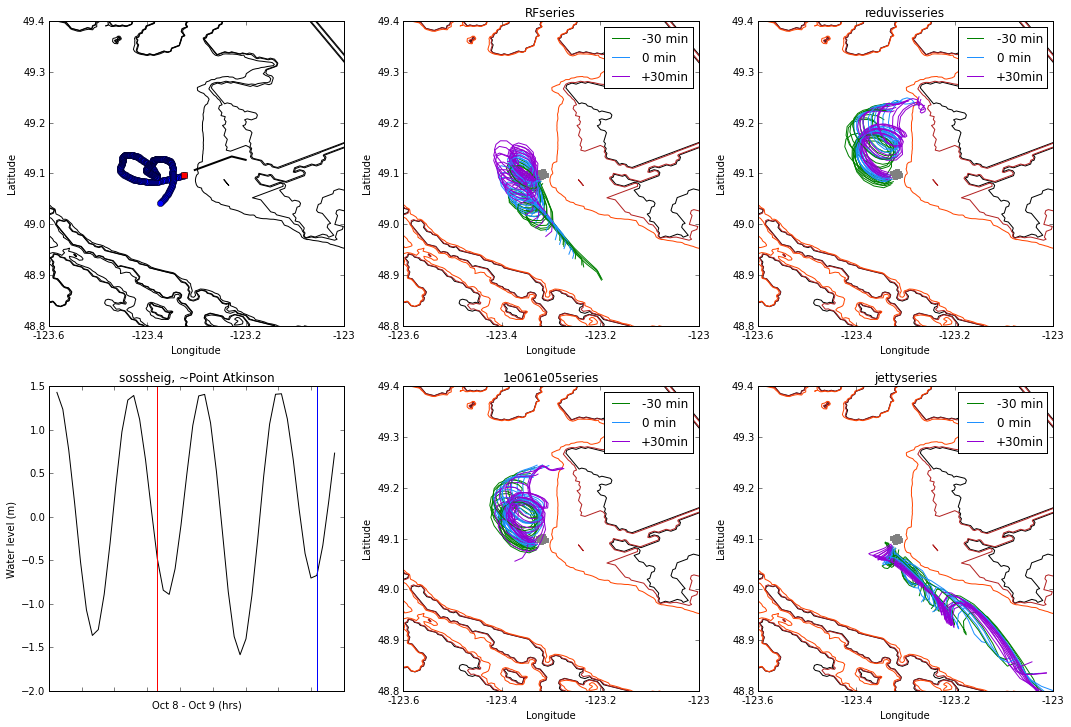

In [13]:
buoy = 4
name, tracks=drifter.organize_info(buoy,ubc)
fig = particle_blast(tracks, dt.datetime(2014,10,8),-1,lon212,lat212,17,27,drifter_one = 'b')

# Drop23

In [14]:
drop = 'drop2/3'
runs=['RFseries','reduvisseries','1e061e05series','jettyseries']
base='/ocean/jieliu/research/meopar/Ariane/result/'
file_pattern = 'ariane_trajectories_qualitative.nc'
lon23 = {}; lat23={}
for run in runs:
    path = os.path.join(base,run, drop,file_pattern)
    f = nc.Dataset(path,'r');
    lon23[run] = f.variables['traj_lon']
    lat23[run] = f.variables['traj_lat']

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


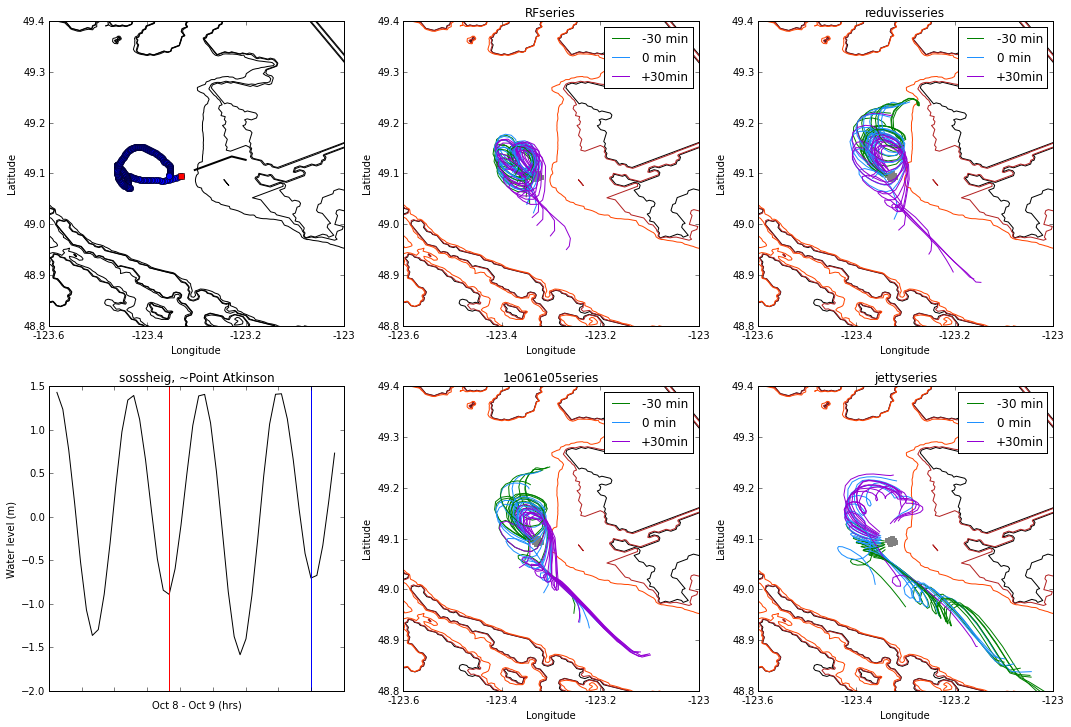

In [15]:
buoy = 7
name, tracks=drifter.organize_info(buoy,ubc)
fig = particle_blast(tracks, dt.datetime(2014,10,8),-1,lon23,lat23,19,24,drifter_one = 'a')

# Drop31

In [16]:
drop = 'drop3/1'
runs=['RFseries','reduvisseries','1e061e05series','jettyseries']
base='/ocean/jieliu/research/meopar/Ariane/result/'
file_pattern = 'ariane_trajectories_qualitative.nc'
lon31 = {}; lat31={}
for run in runs:
    path = os.path.join(base,run, drop,file_pattern)
    f = nc.Dataset(path,'r');
    lon31[run] = f.variables['traj_lon']
    lat31[run] = f.variables['traj_lat']

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


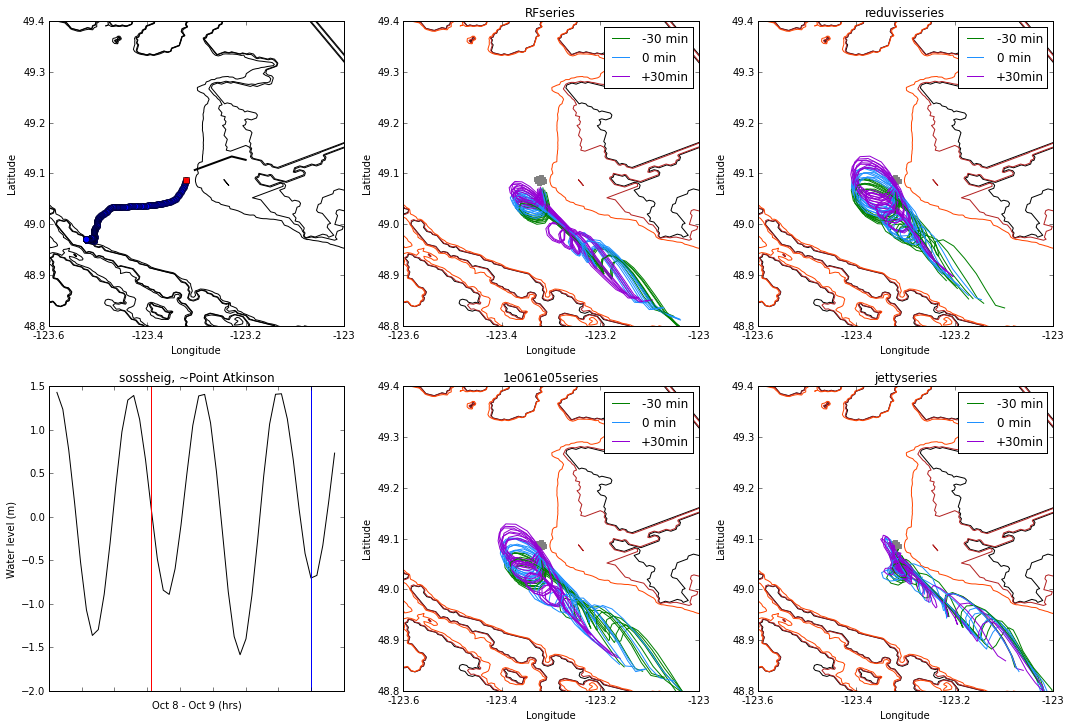

In [17]:
buoy = 0
name, tracks=drifter.organize_info(buoy,ubc)
fig = particle_blast(tracks, dt.datetime(2014,10,8),-1,lon31,lat31,16,27,drifter_one = 'a')

# Drop323a

In [18]:
drop = 'drop3/23'
runs=['RFseries','reduvisseries','1e061e05series','jettyseries']
base='/ocean/jieliu/research/meopar/Ariane/result/'
file_pattern = 'ariane_trajectories_qualitative.nc'
lon323 = {}; lat323={}
for run in runs:
    path = os.path.join(base,run, drop,file_pattern)
    f = nc.Dataset(path,'r');
    lon323[run] = f.variables['traj_lon']
    lat323[run] = f.variables['traj_lat']

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


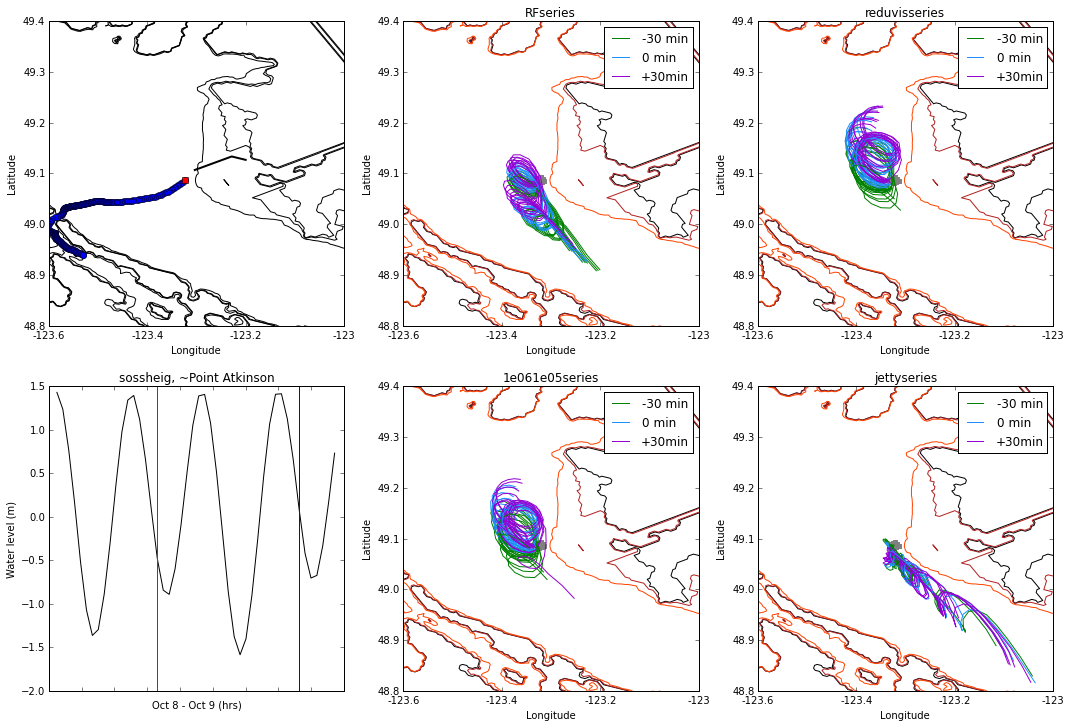

In [19]:
buoy = 5
name, tracks=drifter.organize_info(buoy,ubc)
fig = particle_blast(tracks, dt.datetime(2014,10,8),-1,lon323,lat323,17,24,drifter_one = 'a')

# Drop323b

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


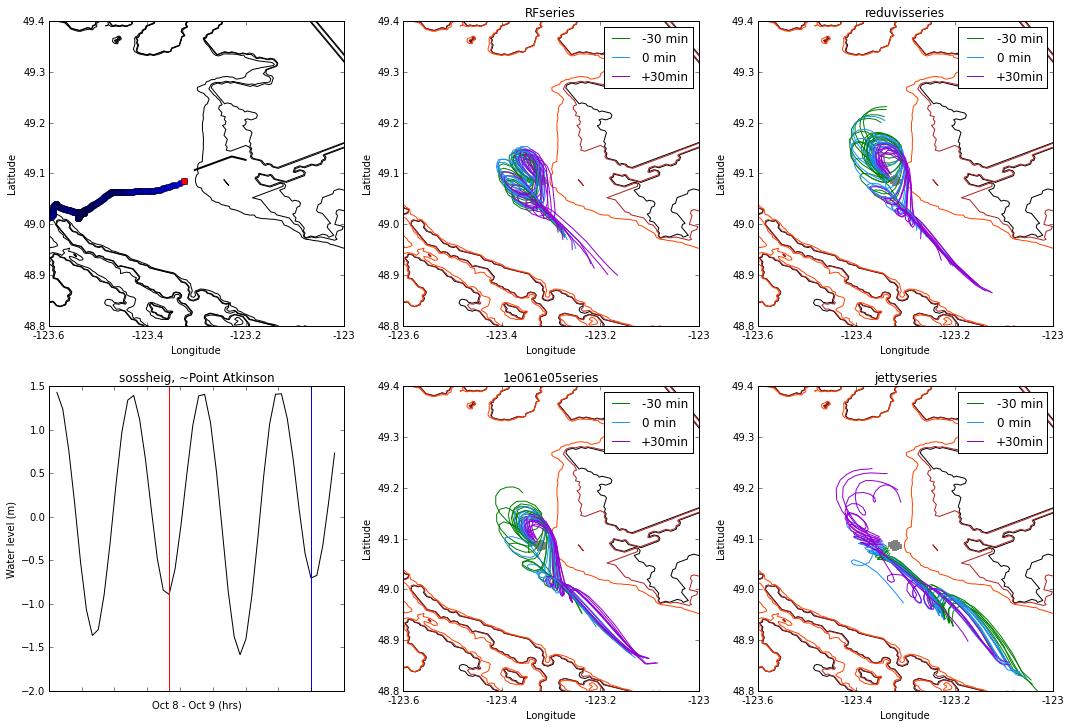

In [20]:
buoy = 6
name, tracks=drifter.organize_info(buoy,ubc)
fig = particle_blast(tracks, dt.datetime(2014,10,8),-1,lon323,lat323,19,24,drifter_one = 'b')